# Exploratory Data Analysis
Author: Alex Searle

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
sns.set_theme(style="darkgrid")

In [3]:
# Read in the data from preprocessing and feature engineering
result_df = pd.read_csv('Data/Modeling_v1.csv')
result_df.drop(columns=['Unnamed: 0'], inplace=True)
result_df.top_3 = result_df.top_3.astype('int')

In [4]:
# Checking What columns we have
result_df.columns

Index(['number', 'grid', 'positionOrder', 'statusId', 'year',
       'points_constructor', 'top3_driver_season_percentage', 'top_3',
       'driver_avg_finish_pos_season', 'Constructor_Top3_Percent',
       'top3_driver_season_percentage_lag', 'driver_avg_finish_pos_season_lag',
       'Constructor_Top3_Percent_lag', 'position_constructor'],
      dtype='object')

In [5]:
# getting info about the numerical data in the data set
result_df.describe().T

,count,mean,std,min,25%,50%,75%,max
grid,15134.0,10.004295,6.584569,0.0,4.0,9.000000,15.000000,31.000000
positionOrder,15134.0,11.596009,7.432500,1.0,5.0,11.000000,17.000000,38.000000
statusId,15134.0,14.058081,23.289399,1.0,1.0,5.000000,12.000000,141.000000
year,15134.0,1995.060526,17.013668,1959.0,1982.0,1994.000000,2011.000000,2023.000000
points_constructor,15134.0,49.256409,90.222775,0.0,4.0,16.000000,51.000000,759.000000
top3_driver_season_percentage,15134.0,16.335907,25.665481,0.0,0.0,0.000000,25.000000,100.000000
top_3,15134.0,0.165521,0.371663,0.0,0.0,0.000000,0.000000,1.000000
driver_avg_finish_pos_season,15134.0,11.589004,3.730778,3.0,9.0,11.078431,13.688172,33.133333
Constructor_Top3_Percent,15134.0,16.458303,22.713919,0.0,0.0,4.166667,28.571429,116.666667
top3_driver_season_percentage_lag,15134.0,15.628664,25.194276,0.0,0.0,0.000000,25.000000,100.000000


In [6]:
print(f'class 1: {result_df[result_df.top_3 == True].top_3.count() / result_df.shape[0]:.2%}')

class 1: 16.55%


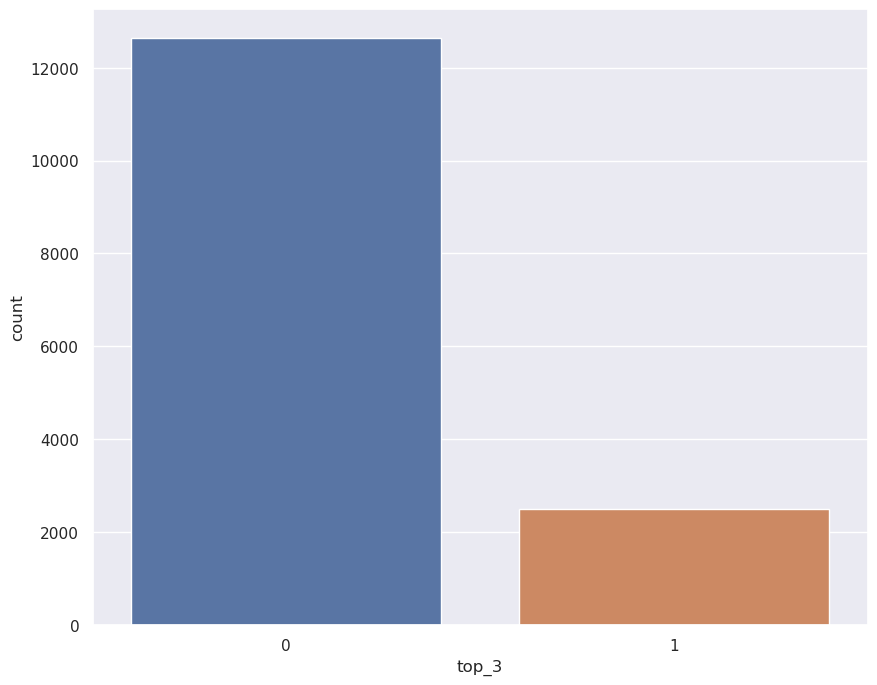

In [7]:
# Distribution of the target which is positionOrder
fig,ax = plt.subplots(figsize=(10,8))
sns.countplot(data=result_df, x='top_3', ax=ax)
plt.savefig('Images/TargetDistribution.png')
plt.show()

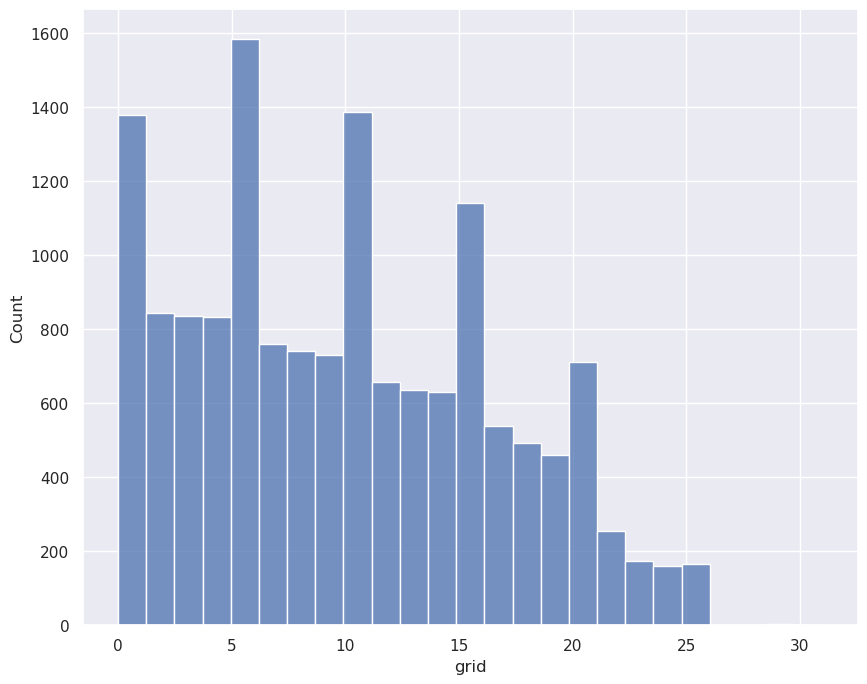

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=result_df, x='grid', bins=25, ax=ax)
plt.savefig(f'Images/GridDistribution.png')
plt.show()

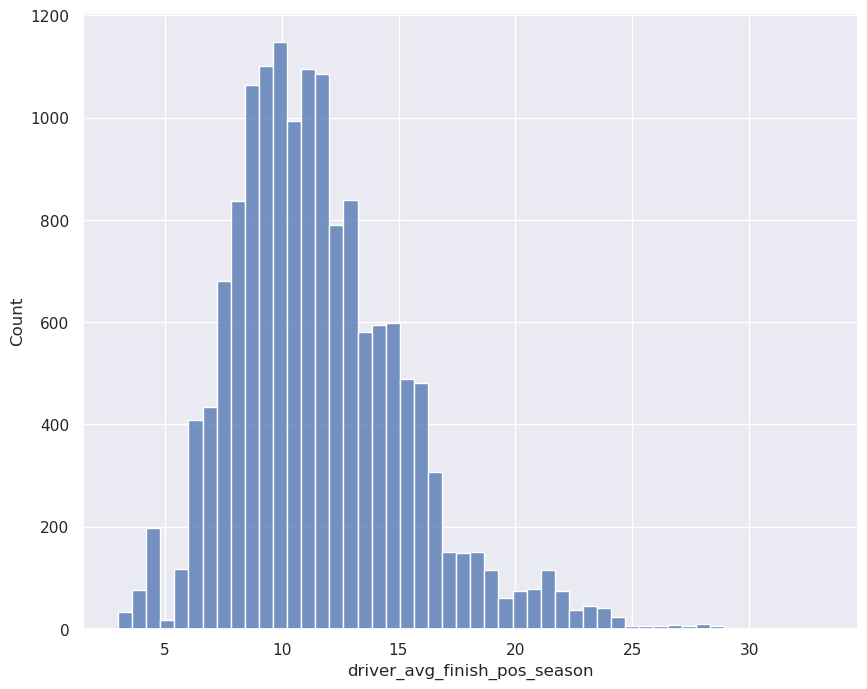

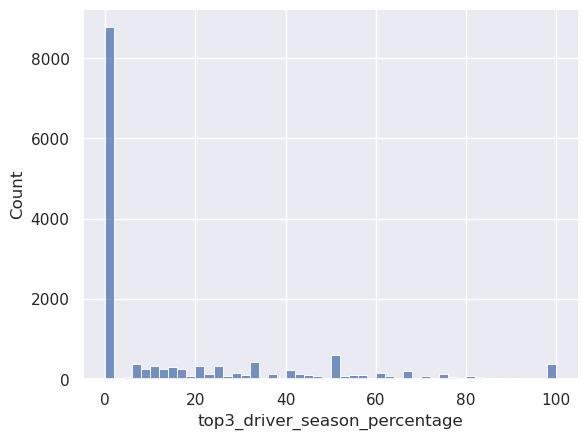

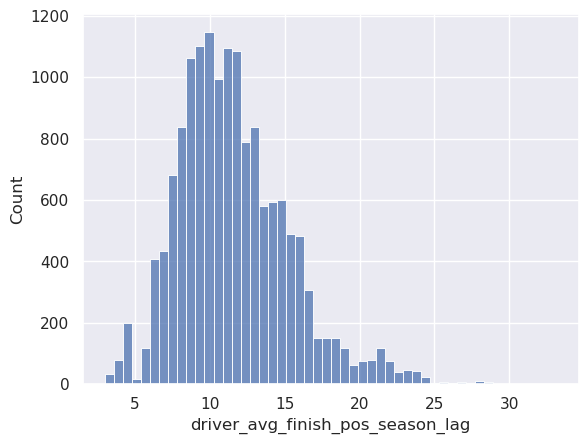

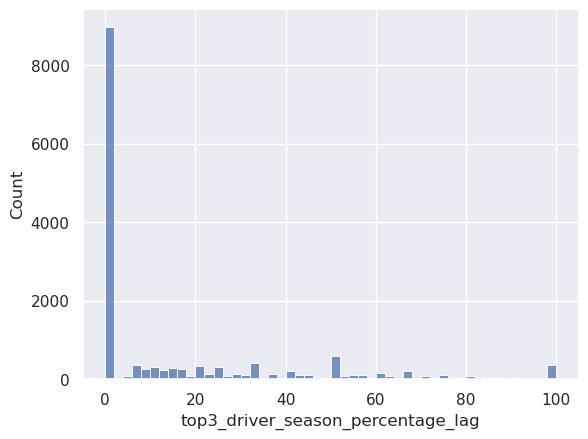

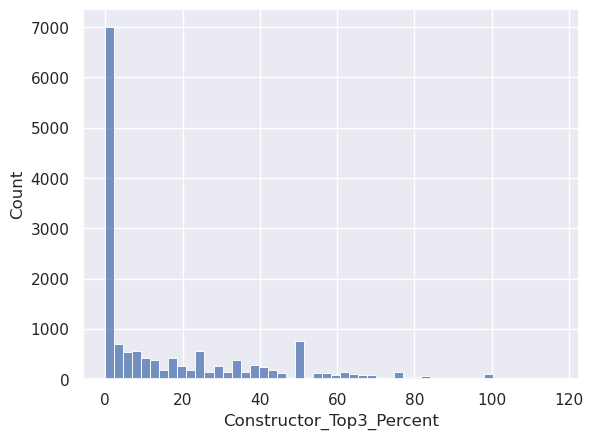

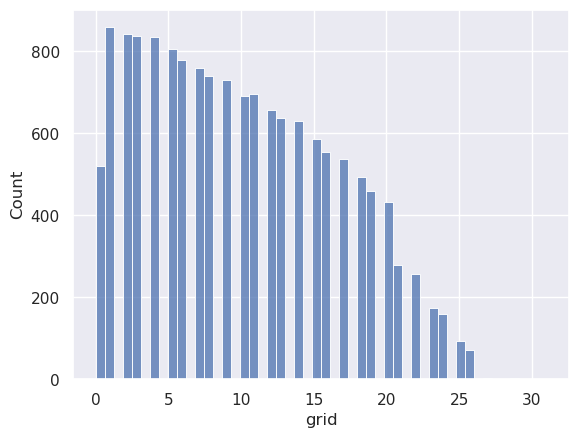

In [8]:
# Getting Distribution Plots
features = ['driver_avg_finish_pos_season', 'top3_driver_season_percentage', 'driver_avg_finish_pos_season_lag', 'top3_driver_season_percentage_lag', 'Constructor_Top3_Percent']
fig, ax = plt.subplots(figsize=(10,8))
for feature in features:
    sns.histplot(data=result_df, x=feature, bins=50)
    plt.savefig(f'Images/{feature}Distribution.png')
    plt.show()

### Getting general overview of relationships

/home/alexsearle/anaconda3/envs/testing/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


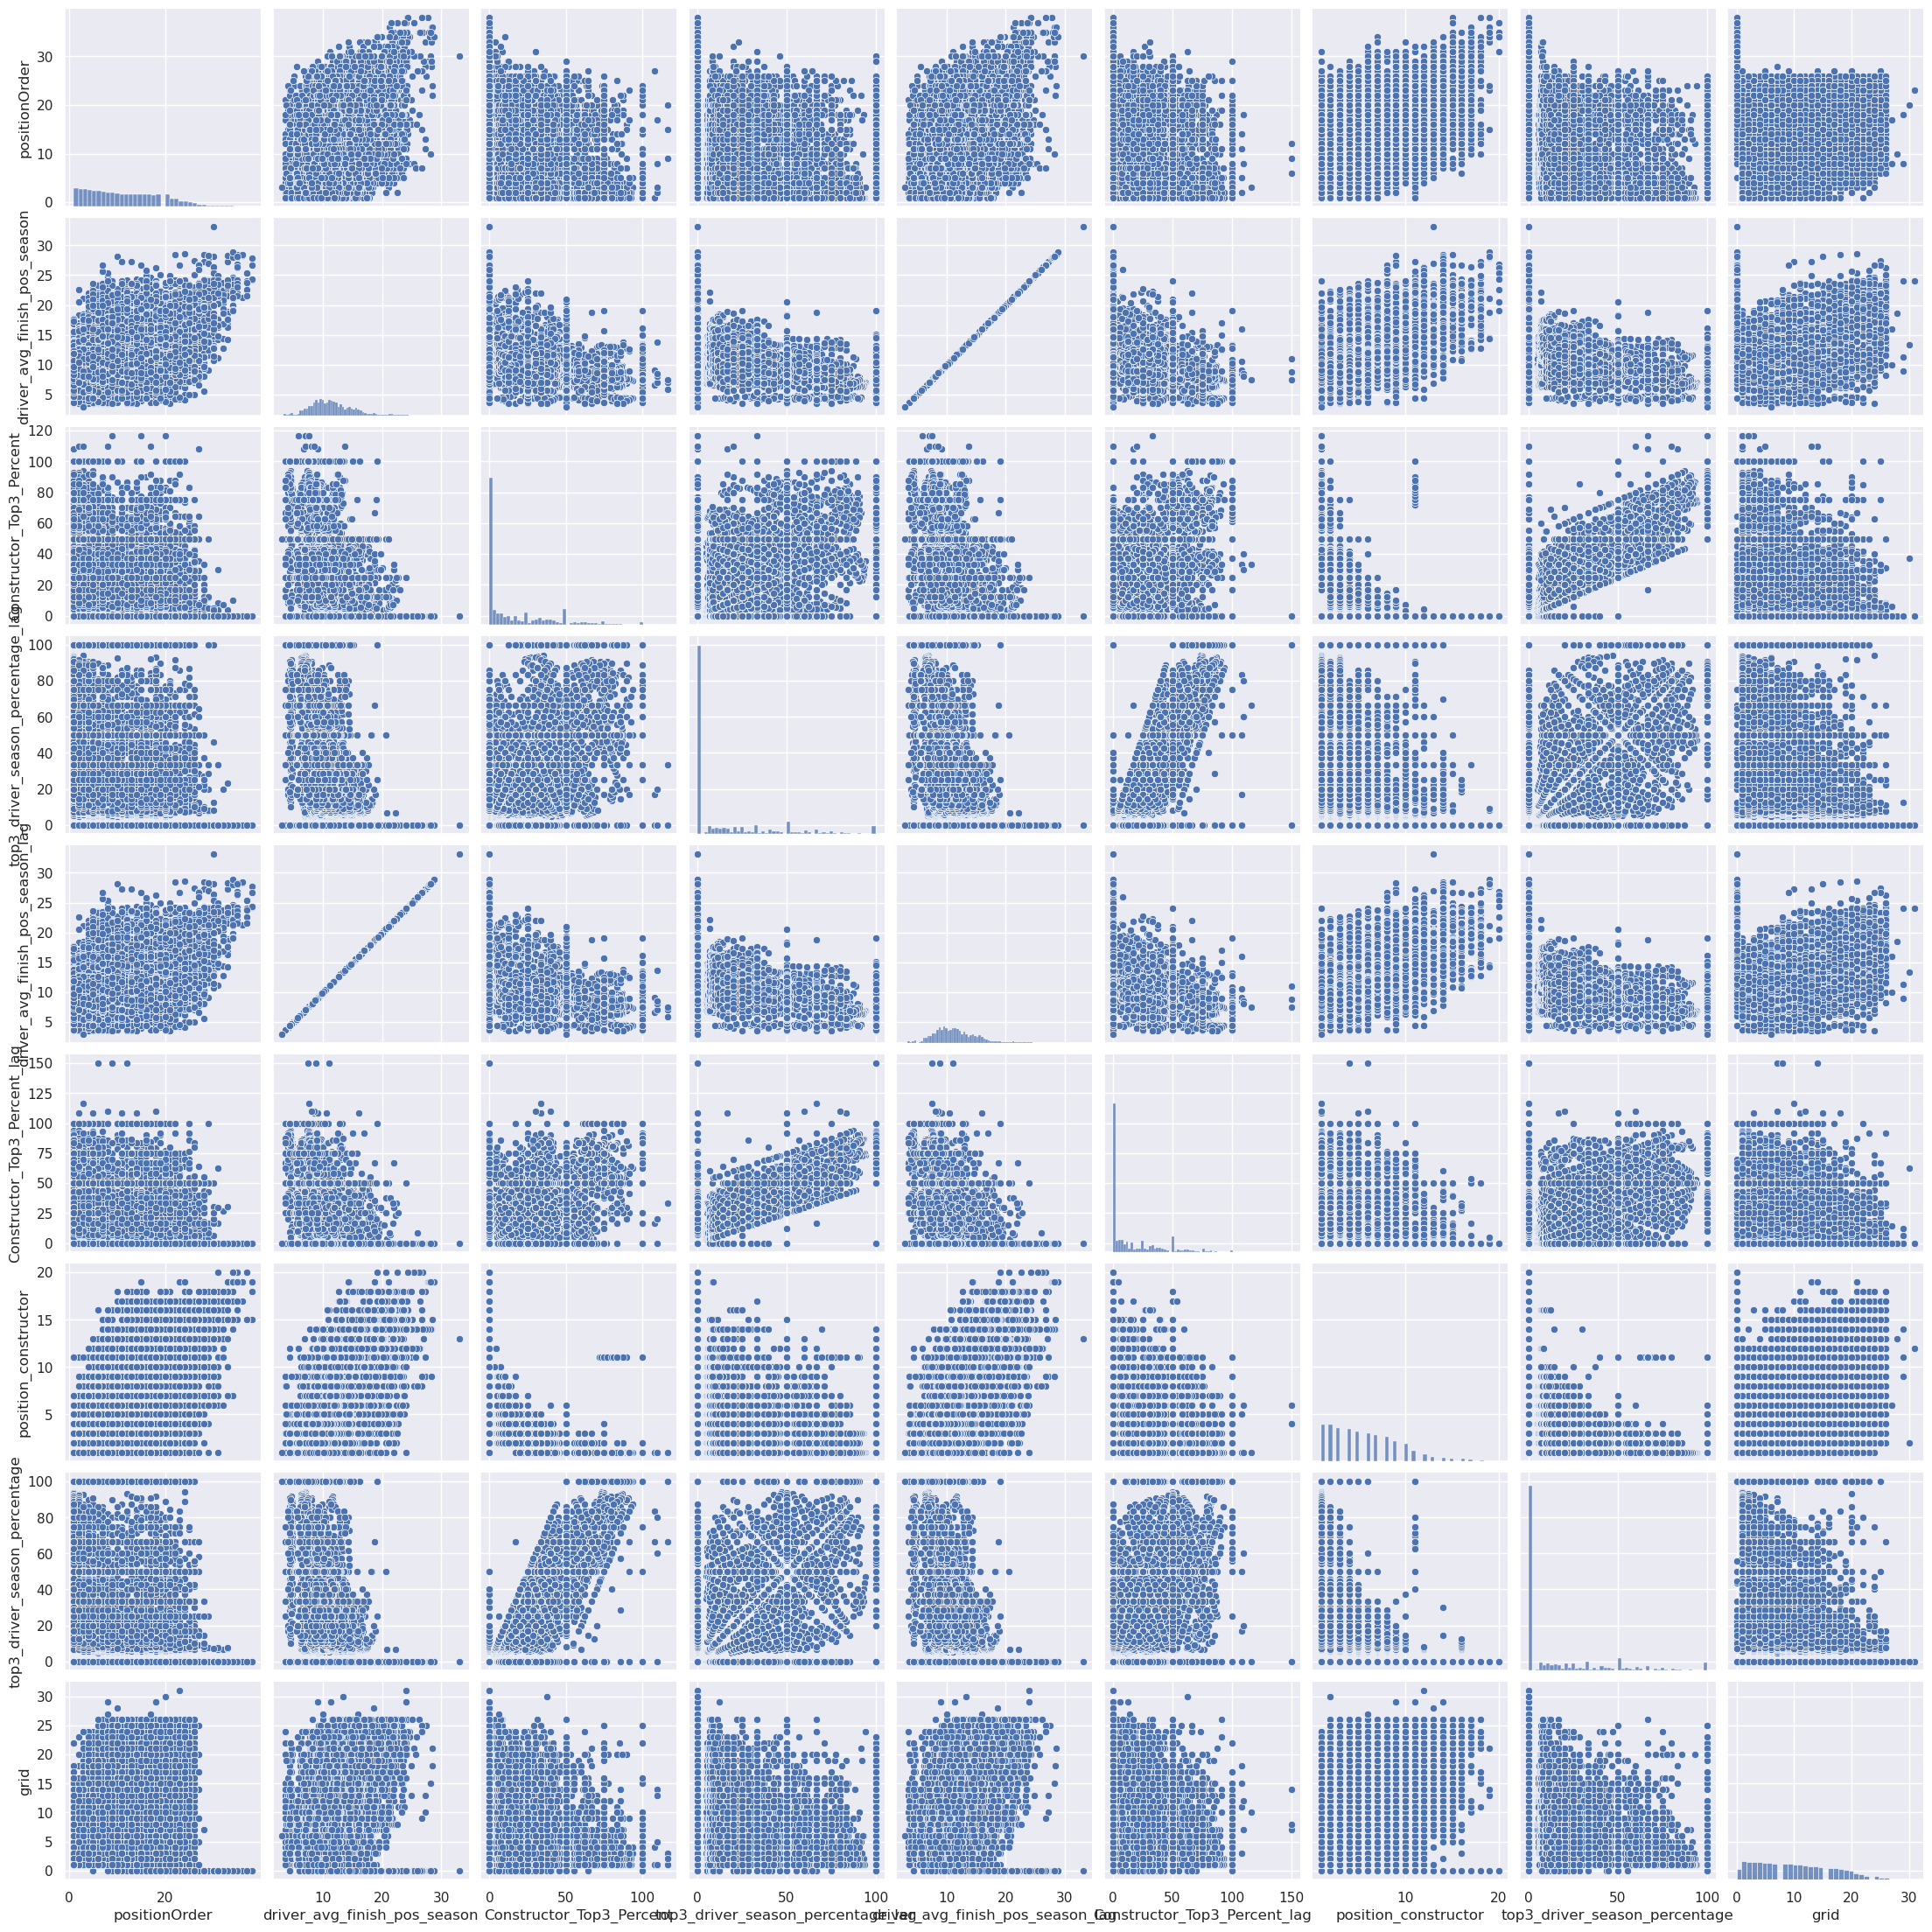

In [18]:
sns.pairplot(result_df[['positionOrder', 'driver_avg_finish_pos_season', 'Constructor_Top3_Percent',
                        'top3_driver_season_percentage_lag', 'driver_avg_finish_pos_season_lag',
                        'Constructor_Top3_Percent_lag',
                        'position_constructor', 'top3_driver_season_percentage', 'grid']])

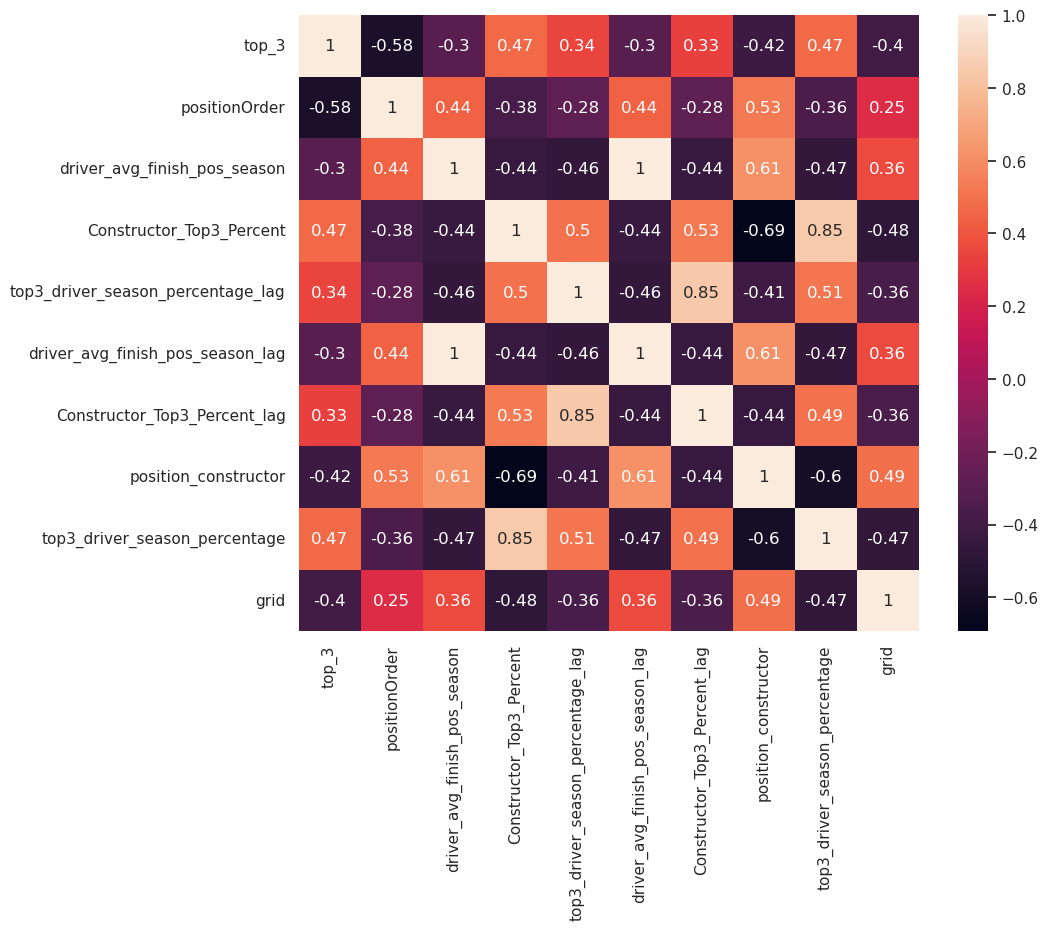

In [19]:
# making a correlation map
corr = result_df[['top_3', 'positionOrder', 'driver_avg_finish_pos_season', 'Constructor_Top3_Percent',
                  'top3_driver_season_percentage_lag', 'driver_avg_finish_pos_season_lag',
                  'Constructor_Top3_Percent_lag',
                  'position_constructor', 'top3_driver_season_percentage', 'grid']].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, ax=ax)
plt.savefig('Images/CorrelationMap.png', bbox_inches="tight")
plt.show()

### Taking closer look at varaibles that are closely correlated with positionOrder

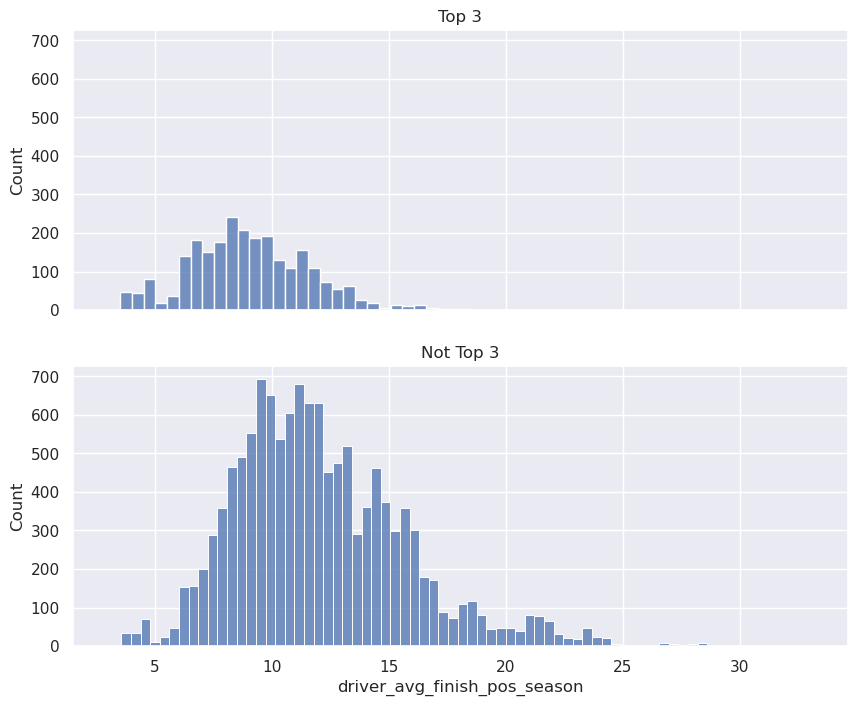

In [29]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='driver_avg_finish_pos_season', ax=ax[0])
sns.histplot(result_df[result_df.top_3 == 0], x='driver_avg_finish_pos_season', ax=ax[1])
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/PositionOrderVsdriver_avg_finish_pos_season.png')
plt.show()

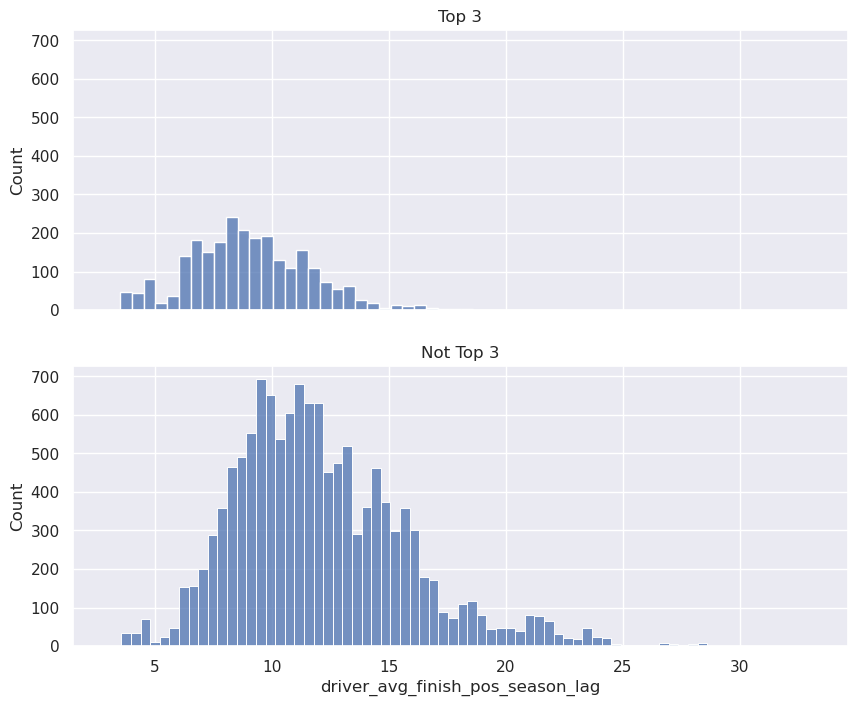

In [30]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='driver_avg_finish_pos_season_lag', ax=ax[0])
sns.histplot(result_df[result_df.top_3 == 0], x='driver_avg_finish_pos_season_lag', ax=ax[1])
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/driver_avg_pos_season_lag.png')
plt.show()

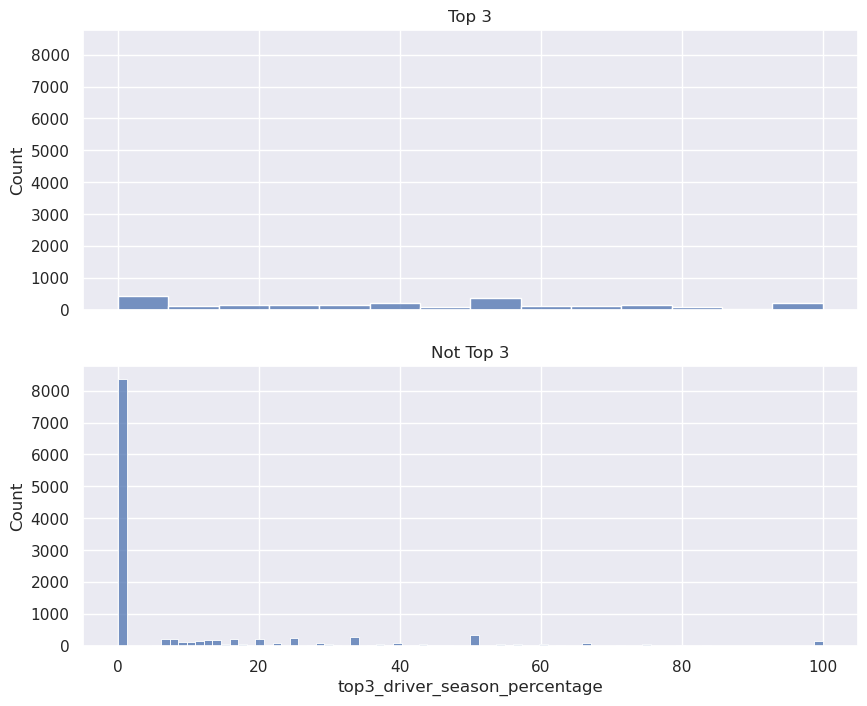

In [31]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='top3_driver_season_percentage', ax=ax[0])
sns.histplot(result_df[result_df.top_3 == 0], x='top3_driver_season_percentage', ax=ax[1])
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/top3_driver_season_percentage.png')
plt.show()

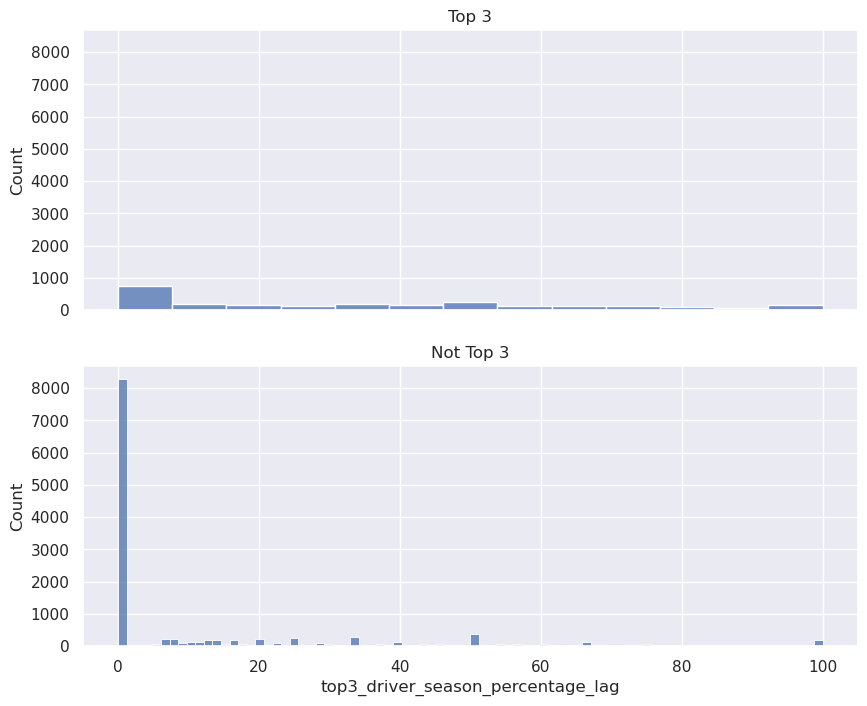

In [32]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='top3_driver_season_percentage_lag', ax=ax[0])
sns.histplot(result_df[result_df.top_3 == 0], x='top3_driver_season_percentage_lag', ax=ax[1])
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/top3_driver_season_percentage_lag.png')
plt.show()

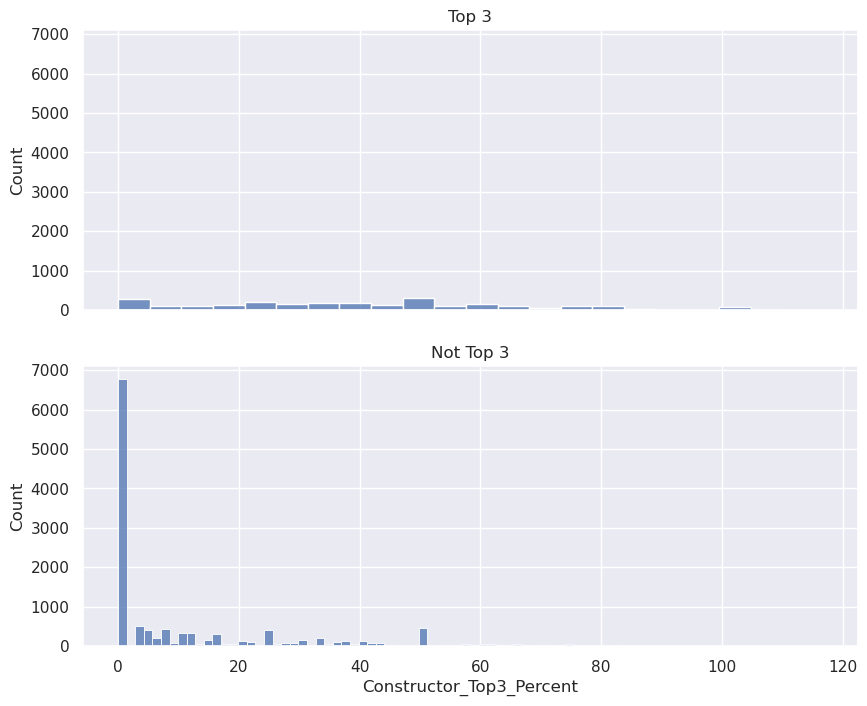

In [33]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='Constructor_Top3_Percent', ax=ax[0])
sns.histplot(result_df[result_df.top_3 == 0], x='Constructor_Top3_Percent', ax=ax[1])
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/Constructor_Top_3Percent.png')
plt.show()

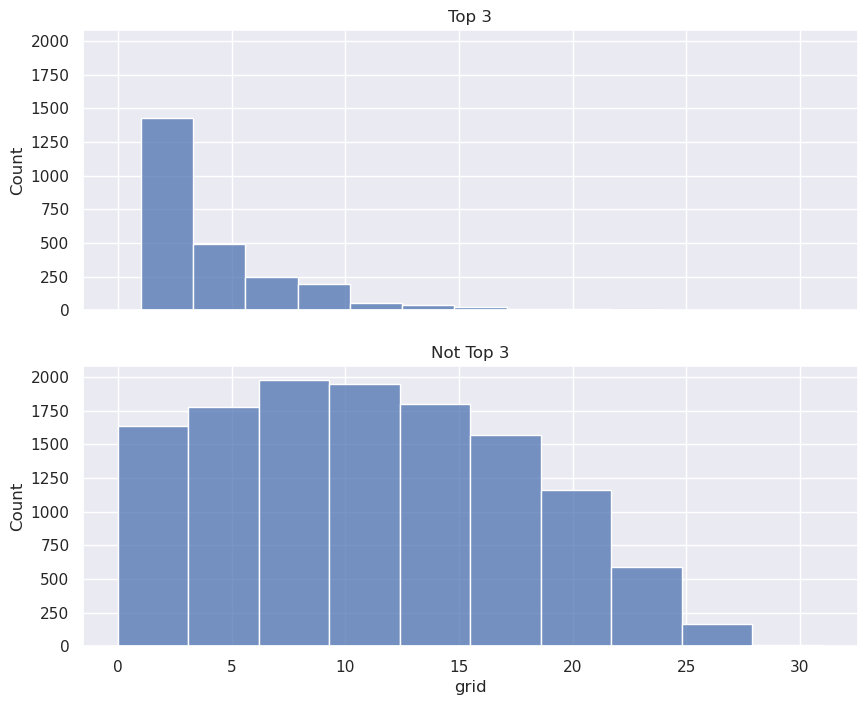

In [34]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='grid', ax=ax[0], bins=10)
sns.histplot(result_df[result_df.top_3 == 0], x='grid', ax=ax[1], bins=10)
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/grid.png')
plt.show()

## Modeling

In [16]:
# starting our modeling with a Decision Tree
# Splitting our model based on years to avoid data leakage
train = result_df[result_df.year < 2000]
test = result_df[result_df.year >= 2000]
X_train = train[features]
X_test = test[features]
y_train = train['top_3']
y_test = test['top_3']

params = {
    'criterion': ['entropy', 'log_loss', 'gini'],
    'max_depth': list(range(3,15)),
    'min_samples_split': list(range(20, 40)),
    'min_impurity_decrease':[.0001, .001, .01, .1]
}
DecisionTreeGridSearch = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, n_jobs=-1, scoring='roc_auc')
DecisionTreeGridSearch.fit(X_train, y_train)
print(f'Best score: {DecisionTreeGridSearch.best_score_}')
print(f'Best params: {DecisionTreeGridSearch.best_params_}')
best_decision_tree = DecisionTreeGridSearch.best_estimator_
test_prediction = best_decision_tree.predict(X_test)
test_score = roc_auc_score(y_test, test_prediction)
print(f'Test score: {test_score}')

Best score: 0.8484406272333651
Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}
Test score: 0.7062990334737176


In [17]:
# Now going to use a Random Forest
param_grid={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': list(range(5,15)),
    'min_samples_split': list(range(20,40)),
    'min_impurity_decrease':[.0001, .001, .01, .1]
}
randomforestgridsearch = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, n_jobs=-1, scoring='roc_auc')
randomforestgridsearch.fit(X_train, y_train)
print(f'Best score: {randomforestgridsearch.best_score_}')
print(f'Best params: {randomforestgridsearch.best_params_}')
best_forest = randomforestgridsearch.best_estimator_
pred = best_forest.predict(X_test)
print(f'Test score: {roc_auc_score(y_test, pred)}')

Best score: 0.8541451166983378
Best params: {'criterion': 'entropy', 'max_depth': 14, 'min_impurity_decrease': 0.001, 'min_samples_split': 38}
Test score: 0.6758093547611422
